In [2]:
import numpy as np
from numpy import arange
import pandas as pd
import random
from sklearn.datasets import load_iris
import math
import matplotlib.pyplot as plt
from pylab import plot, show, xlabel, ylabel

In [3]:
x=load_iris()
#pd.DataFrame(X.data)
y=x['target']
#pd.DtaFrame(y)
x=x.data[0:100,]
y=y[0:100,]
x=np.append(np.ones((x.data.shape[0],1)),x.data,1)
y=np.reshape(y,(-1,1))
m=x.shape[0]
n=x.shape[1]
print(m)
print(n)

100
5


In [4]:
#divide data into train,validate and test as 60%,20%,20%

train_start = 0
train_end = int(.6*m)
validation_start = int(.6*m)
validation_end = int(.8*m)
test_start = int(.8*m)
test_end = m

x_train = x[train_start:train_end,]
y_train = y[train_start:train_end,]

x_validate = x[validation_start:validation_end,]
y_validate = y[validation_start:validation_end,]

x_test = x[test_start:test_end,]
y_test = y[test_start:test_end,]

print (x.shape,y.shape)
print (x_train.shape,y_train.shape)
print (x_validate.shape,y_validate.shape)
print (x_test.shape,y_test.shape)

assert x_train.shape[0]+x_validate.shape[0]+x_test.shape[0] == x.shape[0]
assert y_train.shape[0]+y_validate.shape[0]+y_test.shape[0] == y.shape[0]

(100, 5) (100, 1)
(60, 5) (60, 1)
(20, 5) (20, 1)
(20, 5) (20, 1)


In [5]:
#X dim: m+1*(n+1) where n = no. of fetaures
#y dim: m*1
#theta dim: (n+1)*1
def gradientDescent(X,y,theta,m,alpha,numIter):
    X_transpose = X.transpose()
    prevcost = 1e8
    c=[]
    for i in range(numIter):
        c.append(0)
    for i in range(numIter):
        z=-1*np.dot(X,theta)
        hypothesis = 1/(1+np.exp(z))
        '''
        cost=[]
        cost1=[]
        cost2=[]
        for j in range(m):
            cost1.append(0)
            cost2.append(0)
            cost.append(0)
        '''
        cost=[]
        loss = hypothesis-y
        for j in range(m):
            cost.append(-1*y[j]*math.log(hypothesis[j])+(1-y[j])*math.log(1/(1-hypothesis[j])))
            #cost1[j] = -1*y[j]*math.log(hypothesis[j])
            #cost2[j] = (1-y[j])*math.log(1/(1-hypothesis[j]))
            #cost[j]  =  cost1[j] + cost2[j]
        cost = np.sum(cost)/(m)
        if cost > prevcost:
            "error!! not converging"
            break
        gradient = np.dot(X_transpose,loss)/m
        theta = theta - alpha*gradient
        prevcost = cost
        c[i]=cost
        if i == numIter-1:
            print("Loss: ",cost)
    plot(arange(numIter),c)
    xlabel('Iterations')
    ylabel('Cost Function')
    show()
    return theta

Loss:  0.0555623688402


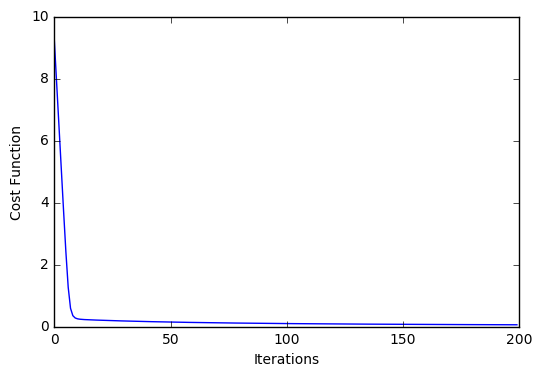

theta values
[[ 0.54625308]
 [-0.78868888]
 [-0.72088002]
 [ 1.4644579 ]
 [ 1.32723175]]


In [16]:
#initialize theta
theta = np.ones((n,1))
theta = gradientDescent(x_train,y_train,theta,x_train.shape[0],0.05,200)
print("theta values")
print(theta)

In [17]:
def predict(X,theta):
    return np.dot(X,theta)

In [28]:
#R^2 function
def score(x,y,theta):
    y_pred = predict(x,theta)
    #print(y_pred)
    for i in range(y.shape[0]):
        if(y_pred[i]>0.5):
            y_pred[i]=1
        else:
            y_pred[i]=0
        print(y_pred[i])
    y_true = y
    #print("error")
    return np.sum((y_pred-np.mean(y_true))**2)

In [29]:

print(score(x_test,y_test,theta))

[ 1.]
[ 0.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 0.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 0.]
[ 1.]
3.0


In [13]:
from sklearn.linear_model import LogisticRegression

In [42]:
alg = LogisticRegression()
alg.fit(x_train,y_train)

/home/julian/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
y_pred = alg.predict(x_test)
print(alg.score(x_test,y_test))
print(alg.coef_)

1.0
[[-0.25633771 -0.43647675 -1.21492493  1.83709384  0.82386238]]
